In [16]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn import metrics
%matplotlib inline


In [17]:
for_sale = pd.read_csv('CSV_backups/ALL-for_sale.csv')

In [18]:
bst = xgb.Booster()
path = '/home/ilya/rentalnerd-models/'
bst.load_model(path + 'all_sales_20170409.model')


In [19]:
cols = for_sale.columns
ind2remove = ['Unnamed: 0', 'address', 'area_name', 'date_listed', 'id', 'listed_diff_id', 'lookup_address',
              'origin_url', 'neighborhood', 'zipcode', 'luxurious', 'transaction_status', 'transaction_type',
              'zestimate_sale']
factors = np.setdiff1d(cols, ind2remove)

data = xgb.DMatrix(for_sale[factors].values, label=for_sale.price, feature_names=factors)

In [20]:
ypred = bst.predict(data)
y_known = for_sale.price
mae = metrics.mean_absolute_error(y_known, ypred)
r2 = metrics.explained_variance_score(y_known, ypred)
  
print("Model Report:\t n:\t%i \t\t MAE Score:\t%f \t\t R^2:\t%f" % (len(y_known), mae, r2))


Model Report:	 n:	1015 		 MAE Score:	7351.262504 		 R^2:	0.996955


In [22]:
diff = pd.Series((ypred - y_known),name='diff')
df = pd.concat([pd.Series(ypred,name='ypred'),y_known, diff],axis=1)

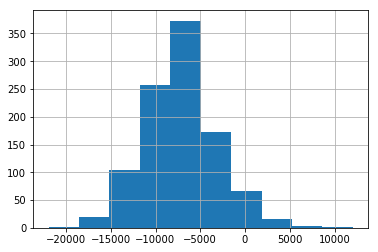

In [23]:
diff.hist()

In [24]:
with_url = pd.concat([for_sale.area_name, for_sale.address, for_sale.origin_url, df], axis=1)
with_url = with_url.sort_values('diff', ascending=False)[(with_url['diff'] > 0) 
                                                         & (with_url['area_name'] == 'PH')
                                                         & (~with_url['address'].str.contains("Buckeye|Sun City West", na=False))
                                                         & (with_url['price'] > 150000)
                                                         & (with_url['price'] < 250000)]
with_url.to_csv('ph_targets.csv')


/home/ilya/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
